# Trabalho Final - Ciência de Dados - Enap / 2020
## Aluno: William Lapa Santos Filho

### Apresentação do Dataset:

#### Trata-se de base dados PÚBLICA coletada do portal Grandes Números DIRPF hospedado pela Receiat Federal do Brasil com apoio do CETAD. Foram extraídas as informações das DIRPFs entregues por município de jurisdição dos anos-calendários de 2015 a 2018.

#### Também utilizaremos a base de população obtida junto ao IBGE ('pop.xlsx')

### Motivação Pessoal:

#### Trata-se de informações relevantes para análise da evolução renda e bens declarados para a administração tributária federal, cujo escopo faz parte da minha atividade profissional. 

## Investigação:

### Hipóteses a serem testadas:

### 1) Os municípios com maior renda per capita (mais ricos) apresentam maiores rendimentos declarados em 2018?

### 2) Os municípios mais ricos apresentam maior rendimento declarado por qtde de declarantes em 2018?

### 3) As deduções com instrução (educação) são relacionadas com os municípios mais ricos (maiores Pib per Capita) em 2018?

### 4) Houve evolução de 215 a 2018 nos rendimentos totais declarados no modelo completo em relação aos municípios com menor Pib Per Capita?

## Importando as principais bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#from google.colab import drive
#drive.mount('/content/drive/')

# Análise Informações DIRPF Agregadas


### Dataset - Importando a base de dados e realizando tratamento iniciais


In [3]:
# Importando a bse de dados da RFB
# fonte: https://receita.economia.gov.br/dados/receitadata/estudos-e-tributarios-e-aduaneiros/estudos-e-estatisticas/11-08-2014-grandes-numeros-dirpf
# concatenando os arquivos de 2015 a 2018.
# As colunas de Rendimento em diante estão em milhares.

# Importando base de população do site IBGE: https://sidra.ibge.gov.br/

# Para o Google
#decl = pd.read_csv('/content/drive/My Drive/TrabalhoFinal/dirpf2015_2018.csv')
#pop_mun = pd.read_csv('/content/drive/My Drive/TrabalhoFinal/pop_mun.csv')
#pop_uf= pd.read_csv('/content/drive/My Drive/TrabalhoFinal/pop_uf.csv')
#pib_mun= pd.read_csv('/content/drive/My Drive/TrabalhoFinal/pib_munic.csv')


decl = pd.read_csv('dirpf2015_2018.csv')
pop_mun = pd.read_csv('pop_mun.csv')
pop_uf= pd.read_csv('pop_uf.csv')
pib_mun= pd.read_csv('pib_munic.csv')

In [15]:
# Primeiro DataFrame contendo informações de população e pib percapita
# Cruzando dados de municípios (fonte: Receita Federal do Brasil) com pib per capita por municípios (fonte: IBGE)
df_pib = decl.merge(pib_mun, left_on='chave', right_on='chave', how='left')
df_pib = df_pib[['Qtde Declarantes', 'Instrução', 'Médicas', 'Bens e Direitos', 'ano',
       'Municipio_x', 'UF_x', 'chave', 'Total Rend',
       'Total Rend por declarante', 'Instrução por declarante',
       'Médicas por declarante', 'Bens e Direitos por declarante', 'Ano'
       , 'Código do Município', 'PIB x 1000',
       'PIB per capita x 1 ']]
df_pib.rename({'UF_x': 'UF', 'Municipio_x': 'Municipio', 'PIB per capita x 1 ':'PIB per capita x 1'},axis=1, inplace=True)
df_pib = df_pib.merge(pop_mun, left_on='Municipio', right_on='Municipio', how='left')
pd.options.display.float_format = '{:.2f}'.format
df_pib['ano'].astype(int)

# Primeiro Data Frame contendo informações de população e pib percapita
df_pib.head() 

,Qtde Declarantes,Instrução,Médicas,Bens e Direitos,ano,Municipio,UF,chave,Total Rend,Total Rend por declarante,...,Médicas por declarante,Bens e Direitos por declarante,Ano,Código do Município,PIB x 1000,PIB per capita x 1,Pop Mun 2015,Pop Mun 2016,Pop Mun 2017,Pop Mun 2018
0,884,544087.86,1332363.16,81259268.80,2015,ABADIA DE GOIAS,GO,2015ABADIA DE GOIAS,46974653.07,53138.75,...,1507.20,91922.25,2015.00,5200050.00,171701.65,21748.15,7895.00,8053.00,8207.00,8583.00
1,572,108173.27,258484.35,75752528.36,2015,ABADIA DOS DOURADOS,MG,2015ABADIA DOS DOURADOS,29753201.79,52016.09,...,451.90,132434.49,2015.00,3100104.00,164480.42,23446.96,7015.00,7037.00,7059.00,6972.00
2,926,776157.39,1313360.98,112458949.72,2015,ABADIANIA,GO,2015ABADIANIA,47339874.13,51122.97,...,1418.32,121445.95,2015.00,5200100.00,289003.06,15994.41,18069.00,18427.00,18775.00,19614.00
3,7246,14736743.17,22390491.54,246027102.31,2015,ABAETETUBA,PA,2015ABAETETUBA,402850510.55,55596.26,...,3090.05,33953.51,2015.00,1500107.00,1192555.06,7927.59,150431.00,151934.00,153380.00,156292.00
4,2157,883004.50,3011041.26,453803065.76,2015,ABAETE,MG,2015ABAETE,165166853.93,76572.49,...,1395.94,210386.22,2015.00,3100203.00,339606.98,14429.87,23535.00,23574.00,23611.00,23223.00


In [16]:
# Testando o dataframe

df_pib[df_pib['Municipio']=='ABADIA DE GOIAS']

,Qtde Declarantes,Instrução,Médicas,Bens e Direitos,ano,Municipio,UF,chave,Total Rend,Total Rend por declarante,...,Médicas por declarante,Bens e Direitos por declarante,Ano,Código do Município,PIB x 1000,PIB per capita x 1,Pop Mun 2015,Pop Mun 2016,Pop Mun 2017,Pop Mun 2018
0,884,544087.86,1332363.16,81259268.80,2015,ABADIA DE GOIAS,GO,2015ABADIA DE GOIAS,46974653.07,53138.75,...,1507.20,91922.25,2015.00,5200050.00,171701.65,21748.15,7895.00,8053.00,8207.00,8583.00
7984,879,530218.47,1525350.84,84904928.59,2016,ABADIA DE GOIAS,GO,2016ABADIA DE GOIAS,43924279.78,49970.74,...,1735.33,96592.64,2016.00,5200050.00,165066.91,20497.57,7895.00,8053.00,8207.00,8583.00
15968,921,576505.53,1738161.52,88157870.93,2017,ABADIA DE GOIAS,GO,2017ABADIA DE GOIAS,48649079.89,52822.02,...,1887.25,95719.73,2017.00,5200050.00,234041.69,28517.33,7895.00,8053.00,8207.00,8583.00
23952,990,624261.32,1858368.01,89029154.41,2018,ABADIA DE GOIAS,GO,2018ABADIA DE GOIAS,53508969.45,54049.46,...,1877.14,89928.44,2018.00,5200050.00,227500.09,26505.89,7895.00,8053.00,8207.00,8583.00


In [17]:
df_pib.describe()

,Qtde Declarantes,Instrução,Médicas,Bens e Direitos,ano,Total Rend,Total Rend por declarante,Instrução por declarante,Médicas por declarante,Bens e Direitos por declarante,Ano,Código do Município,PIB x 1000,PIB per capita x 1,Pop Mun 2015,Pop Mun 2016,Pop Mun 2017,Pop Mun 2018
count,31935.00,31935.00,31935.00,31935.00,31935.00,31935.00,31934.00,31934.00,31934.00,31934.00,31732.00,31732.00,31732.00,31732.00,31724.00,31724.00,31724.00,31724.00
mean,4669.35,3571565.03,12060583.27,1247229243.86,2016.50,444028013.86,59395.05,471.79,1276.64,126356.56,2016.50,3229669.38,1030656.73,21185.32,35277.34,35548.97,35823.50,36005.61
std,44684.81,33792498.40,163877879.72,24274925392.15,1.12,6310485425.38,21559.01,316.99,745.29,233732.28,1.12,976943.83,9712323.33,23056.81,189239.00,190483.95,191704.25,193310.91
min,0.00,0.00,0.00,0.00,2015.00,0.00,21040.51,0.00,0.00,573.08,2015.00,1100015.00,11501.40,3089.57,818.00,815.00,812.00,786.00
25%,282.00,86041.62,254464.78,15651569.79,2015.50,14248485.52,47349.00,249.54,810.80,41708.95,2015.75,2509800.00,75712.60,8955.39,5549.00,5578.00,5603.00,5503.00
50%,608.00,220944.71,710869.44,58487742.83,2016.00,34189372.40,55897.84,402.55,1171.80,97907.00,2016.50,3134905.00,169105.90,15472.02,11766.50,11784.00,11773.00,11722.00
75%,1735.00,853222.56,2446125.21,243696673.84,2017.00,111127584.78,67524.98,605.60,1612.29,179903.58,2017.25,4118204.00,448707.68,26077.10,24842.00,25030.00,25100.00,25249.00
max,3248241.00,2063372428.34,12348333267.49,2149146240806.77,2018.00,498025332808.36,975468.41,4710.42,46969.95,16014725.14,2018.00,5300108.00,714683362.46,583171.85,11967825.00,12038175.00,12106920.00,12176866.00


## Análise exploratória dos dados

### Hipótese 1:

#### Existe uma correlação direta positiva em rendimentos totais declarados por contribuinte e o pib per capita de cada município. Iremos testar essa hipótese no gráfico abaixo:

In [ ]:
fig, ax1 = plt.subplots(1, 1, figsize=(15, 6))
sns.set(style="darkgrid")
ax1 = sns.boxplot(y="Total Rend por declarante", x='PIB per capita x 1', hue='ano', data=df_pib[df_pib['ano']==2018])

### Hipótese 2:

#### Existe uma correlação direta positiva em Bens e Direitos declarados por contribuinte e o pib per capita de cada município. Iremos testar essa hipótese no gráfico abaixo:

In [20]:
df_qtde = df_pib.groupby(['ano'], as_index=False).sum()
df_qtde.head()

,ano,Qtde Declarantes,Instrução,Médicas,Bens e Direitos,Total Rend,Total Rend por declarante,Instrução por declarante,Médicas por declarante,Bens e Direitos por declarante,Ano,Código do Município,PIB x 1000,PIB per capita x 1,Pop Mun 2015,Pop Mun 2016,Pop Mun 2017,Pop Mun 2018
0,2015,35677122,27771875203.57,79713141313.49,8587032828010.98,3211746866514.98,442098156.59,3599158.89,8768765.73,960593998.66,15984995.00,25620463770.00,7591848150.85,153878112.72,279929492.00,282084726.00,284263010.00,285710484.00
1,2016,36325446,28393483336.20,90263755939.83,9688206081419.05,3418965000610.06,467596343.45,3765042.96,9984132.98,1002932228.19,15992928.00,25620463770.00,7919591884.70,163249737.70,279929492.00,282084726.00,284263010.00,285710484.00
2,2017,37784246,29033551085.27,101935478165.78,10520067795106.50,3667586060071.23,482181073.16,3827899.40,10563855.57,1022779402.19,16000861.00,25621470616.00,8336646084.93,172034334.10,279639652.00,281792964.00,283969398.00,285410502.00
3,2018,39328938,28859019498.83,113242351273.82,11034959198133.43,3881736695428.75,504845795.05,3873965.37,11451626.88,1048764875.95,16008794.00,25621470616.00,8856713086.32,183090441.57,279639652.00,281792964.00,283969398.00,285410502.00


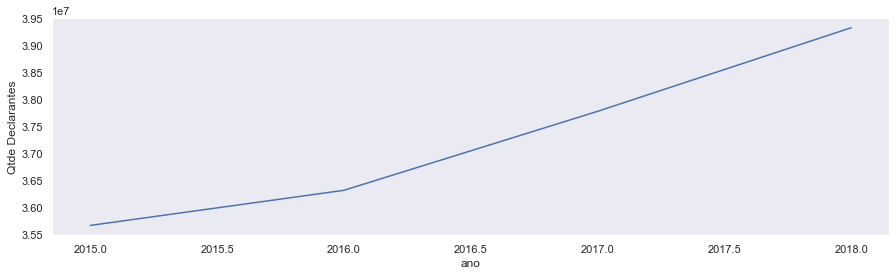

In [22]:
fig, ax1 = plt.subplots(1, 1, figsize=(15, 4))
sns.set(style="dark")
ax1 = sns.lineplot(x="ano", y="Qtde Declarantes", data=df_qtde)

## Hipótese 3:

#### Há uma relação linear entre crescimento da população e quantidade de declarações enviadas a Receita Federal do Brasil. Iremos testar essa hipótese no gráfico abaixo:

In [ ]:
fig, ax1 = plt.subplots(1, 1, figsize=(15, 4))
sns.set(style="darkgrid")
ax1 = sns.countplot(y="Status", data=dataset)

In [ ]:
fig, ax1 = plt.subplots(1, 1, figsize=(15, 4))
sns.set(style="darkgrid")
ax1 = sns.countplot(y="Tipo de Representação Legal", data=dataset)

In [ ]:
fig, ax1 = plt.subplots(1, 1, figsize=(15, 4))
sns.set(style="whitegrid")
ax1 = sns.countplot(y="Motivo Alteracao Malha", data=dataset)